# Efficiency tests of the Network Diffusion library

Despite the library has always been considered as prototype that shows a way to simulate propagation of multiple phenomena in the network and not as a fast solution, we provide a short example that allows to feel how its time efficiency looks like comparing to competitive tool - NDlib.

In this notebook we perform experiments on simple single-lateral SIR model.


In [1]:
%load_ext autoreload
%autoreload 2

## Necessary imports

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

from time_measurements import DataSample, time_complexity, plot_time_efficiency
from tested_functions import sir_ndlib, sir_ndiff

## Example of the experiment methodology

We have two simple implementations of function that returns n-th element of a Fibonacci sequence. In the experiment we will execute both methods on a data that make computations steadily harder - in this example it's just a larger requested number from 1st to 20th. For each sample, the execution of the function will be repeated 10 times in order to mitigate side effects that burden processor. Each call of the function is measured in milliseconds. Then, the bulk data in form of DataFrame is obtained (variables `data_fibiter`, `data_fibrecu`). The final step is plotting the figure. Each curve consists of points that reflects mean time of execution for given sample. We also mark the standard deviation by highlighting area around the curve.

### Initialisation of testing data

In [3]:
def fibonacci_recursive(n: int) -> int:
    """Computes Fibonacci sequence in recursive way."""
    if n in {0, 1}:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

def fibonacci_iterative(n: int) -> int:
    """Computes Fibonacci sequence in iterative way."""
    if n in {0, 1}:
        return n
    previous, fib_number = 0, 1
    for _ in range(2, n + 1):
        cache = fib_number
        fib_number = previous + fib_number
        previous = cache
    return fib_number

testing_data = [DataSample(name=i, data=(i, )) for i in range(1, 20, 2)]

### Run of the experiment

In [4]:
data_fibiter = time_complexity(fibonacci_iterative, testing_data, 10)
data_fibrecu = time_complexity(fibonacci_recursive, testing_data, 10)

### Plot figures

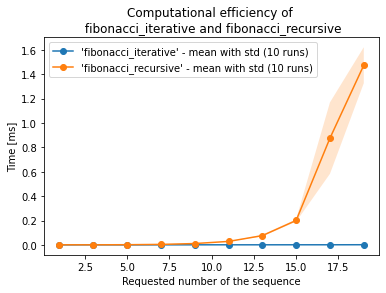

In [5]:
fig, axes = plt.subplots()
plot_time_efficiency(data_fibiter, fibonacci_iterative.__name__, axes)
plot_time_efficiency(data_fibrecu, fibonacci_recursive.__name__, axes)
axes.set_title(f"Computational efficiency of \n {fibonacci_iterative.__name__} and {fibonacci_recursive.__name__}")
axes.set_xlabel("Requested number of the sequence")
axes.set_ylabel("Time [ms]")
axes.legend(loc='upper left')
plt.show()

## Comparison of the Network Diffusion and NDlib

### Initialisation of testing data

We are performing experiment on SIR simulation with varying size of Erdos-Renyi graph. Other parameters are fixed.

In [6]:
p_edge = 0.1
beta = 0.005
gamma = 0.05
fraction_infected = 0.05
num_iterations = 200

testing_data = [
    DataSample(name=i, data=(nx.erdos_renyi_graph(i, p_edge), beta, gamma, fraction_infected, num_iterations))
    for i in range(10, 200, 5)
]

### Run of the experiment

In [ ]:
data_ndlib = time_complexity(sir_ndlib, testing_data, 10)
data_ndiff = time_complexity(sir_ndiff, testing_data, 10)

/usr/local/anaconda3/envs/network_diffusion_examples/lib/python3.7/site-packages/ndlib/models/DiffusionModel.py:170: UserWarning: The fraction_infected value is too low given the number of nodes of the selected graph: a single node will be set as infected
  "The fraction_infected value is too low given the number of nodes of the selected graph: a "
Processing epoch 99:  42%|████▏     | 84/200 [00:00<00:00, 385.01it/s]

### Plot figures

We will plot three figures:
 - with both curves for network_diffusion and ndlib
 - with curve for network_diffusion
 - with curve for ndlib

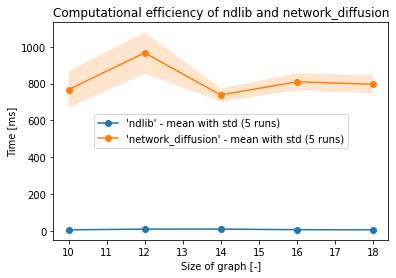

In [33]:
fig, axes = plt.subplots()
plot_time_efficiency(data_ndlib, "ndlib", axes)
plot_time_efficiency(data_ndiff, "network_diffusion", axes)
axes.set_title(f"Computational efficiency of ndlib and network_diffusion")
axes.set_xlabel("Size of graph [-]")
axes.set_ylabel("Time [ms]")
axes.legend(loc='center')
plt.show()

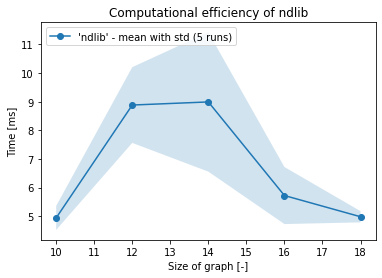

In [30]:
fig, axes = plt.subplots()
plot_time_efficiency(data_ndlib, "ndlib", axes)
axes.set_title(f"Computational efficiency of ndlib")
axes.set_xlabel("Size of graph [-]")
axes.set_ylabel("Time [ms]")
axes.legend(loc='upper left')
plt.show()

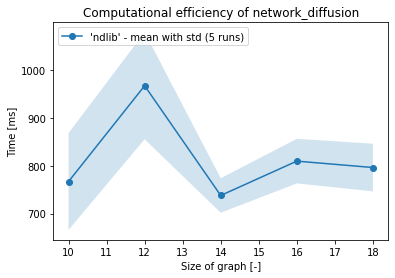

In [31]:
fig, axes = plt.subplots()
plot_time_efficiency(data_ndiff, "ndlib", axes)
axes.set_title(f"Computational efficiency of network_diffusion")
axes.set_xlabel("Size of graph [-]")
axes.set_ylabel("Time [ms]")
axes.legend(loc='upper left')
plt.show()